In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from datetime import datetime, timedelta
%matplotlib inline

In [5]:
latList = [-8] #, -9, -8, -5, -2, 0, 2, 5, 8, 9]
lonList = [-110] #, -95, -110, -125, -140, -155, -170, -180, 165]
readDir = '/srv/data2/srai_poseidon/srai_poseidon/observation/SatelliteVsBuoy/downloads/QS_data/qs_l2b_v4p1/'
fileList = glob.glob(readDir + '/qs_l2b_?????_v4.1_*.nc')
writeDir = '/srv/data2/srai_poseidon/srai_poseidon/observation/SatelliteVsBuoy/downloads/QS_data/'
tol = 0.1

for fileName in glob.glob(writeDir + 'T_????_????_QS.nc'):
    os.remove(fileName)

In [8]:
ds = xr.open_dataset(fileList[0])
ds = ds.set_coords('time')
ds = ds.swap_dims({'along_track':'time'})

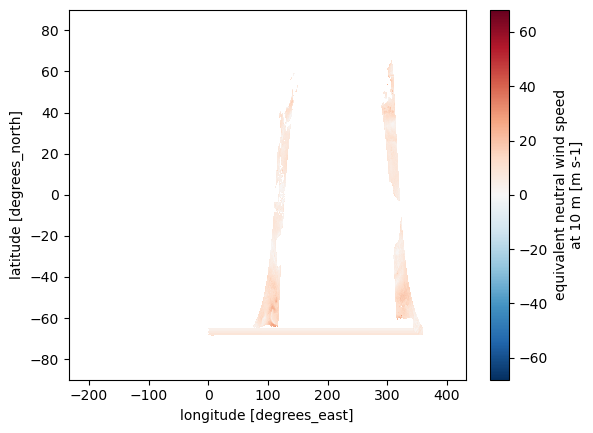

In [13]:
ds.retrieved_wind_speed.plot(x='lon', y='lat')
thisLat = -40
thisLon = 100
mask = np.logical_and((abs(ds['lat'] - thisLat) < 0.5), (abs(ds['lon'] - thisLon) < 0.5))
sub_ds = ds.where(mask, drop=True)

In [17]:
sub_ds

<xarray.Dataset>
Dimensions:                           (time: 10, cross_track: 9, ambiguities: 4)
Coordinates:
  * time                              (time) datetime64[ns] 2003-04-16T10:05:...
    lat                               (time, cross_track) float32 -39.65 ... ...
    lon                               (time, cross_track) float32 100.8 ... 9...
    num_ambiguities                   (time, cross_track) float32 4.0 ... 4.0
Dimensions without coordinates: cross_track, ambiguities
Data variables: (12/21)
    retrieved_wind_speed              (time, cross_track) float32 nan ... nan
    retrieved_wind_direction          (time, cross_track) float32 nan ... nan
    rain_impact                       (time, cross_track) float32 nan ... nan
    flags                             (time, cross_track) float32 nan ... nan
    eflags                            (time, cross_track) float32 nan ... nan
    nudge_wind_speed                  (time, cross_track) float32 nan ... nan
    ...                                ...
    number_in_aft                     (time, cross_track) float32 nan ... nan
    number_out_fore                   (time, cross_track) float32 nan ... nan
    number_out_aft                    (time, cross_track) float32 nan ... nan
    gmf_sst                           (time, cross_track) float32 nan ... nan
    distance_from_coast               (time, cross_track) float32 nan ... nan
    exp_bias_wrt_oceanward_neighbors  (time, cross_track) float32 nan ... nan
Attributes: (12/51)
    history:                     2017-355T15:48:16+0000 fore /home/fore/sds/v...
    processing_level:            L2B
    date_created:                2017-355T15:48:16
    cross_track_resolution:      12.5
    along_track_resolution:      12.5
    zero_index:                  76
    ...                          ...
    references:                  10.1109/TGRS.2012.2235843; 10.1109/TGRS.2014...
    InstrumentShortName:         SeaWinds
    ancillary_data_descriptors:  QS_PC2B0006.CP12\nQS_MC2B0001\nSNWP120031061...
    data_format_type:            netCDF-4
    version_id:                  V4.1
    GranulePointer:              qs_l2b_19909_v4.1_200304160838.nc

In [15]:
sub_ds
list(sub_ds.keys())

['retrieved_wind_speed',
 'retrieved_wind_direction',
 'rain_impact',
 'flags',
 'eflags',
 'nudge_wind_speed',
 'nudge_wind_direction',
 'retrieved_wind_speed_uncorrected',
 'cross_track_wind_speed_bias',
 'atmospheric_speed_bias',
 'wind_obj',
 'ambiguity_speed',
 'ambiguity_direction',
 'ambiguity_obj',
 'number_in_fore',
 'number_in_aft',
 'number_out_fore',
 'number_out_aft',
 'gmf_sst',
 'distance_from_coast',
 'exp_bias_wrt_oceanward_neighbors']

In [25]:
sub_ds

<xarray.Dataset>
Dimensions:                           (time: 10, cross_track: 9, ambiguities: 4)
Coordinates:
  * time                              (time) datetime64[ns] 2003-04-16T10:05:...
    num_ambiguities                   (time, cross_track) float32 4.0 ... 4.0
Dimensions without coordinates: cross_track, ambiguities
Data variables: (12/23)
    retrieved_wind_speed              (time, cross_track) float32 nan ... nan
    retrieved_wind_direction          (time, cross_track) float32 nan ... nan
    rain_impact                       (time, cross_track) float32 nan ... nan
    flags                             (time, cross_track) float32 nan ... nan
    eflags                            (time, cross_track) float32 nan ... nan
    nudge_wind_speed                  (time, cross_track) float32 nan ... nan
    ...                                ...
    number_out_aft                    (time, cross_track) float32 nan ... nan
    gmf_sst                           (time, cross_track) float32 nan ... nan
    distance_from_coast               (time, cross_track) float32 nan ... nan
    exp_bias_wrt_oceanward_neighbors  (time, cross_track) float32 nan ... nan
    lat                               (time, cross_track) float32 -39.65 ... ...
    lon                               (time, cross_track) float32 100.8 ... 9...
Attributes: (12/51)
    history:                     2017-355T15:48:16+0000 fore /home/fore/sds/v...
    processing_level:            L2B
    date_created:                2017-355T15:48:16
    cross_track_resolution:      12.5
    along_track_resolution:      12.5
    zero_index:                  76
    ...                          ...
    references:                  10.1109/TGRS.2012.2235843; 10.1109/TGRS.2014...
    InstrumentShortName:         SeaWinds
    ancillary_data_descriptors:  QS_PC2B0006.CP12\nQS_MC2B0001\nSNWP120031061...
    data_format_type:            netCDF-4
    version_id:                  V4.1
    GranulePointer:              qs_l2b_19909_v4.1_200304160838.nc

In [23]:
sub_ds = sub_ds.reset_coords(['lat', 'lon'])
list(sub_ds.keys())

['retrieved_wind_speed',
 'retrieved_wind_direction',
 'rain_impact',
 'flags',
 'eflags',
 'nudge_wind_speed',
 'nudge_wind_direction',
 'retrieved_wind_speed_uncorrected',
 'cross_track_wind_speed_bias',
 'atmospheric_speed_bias',
 'wind_obj',
 'ambiguity_speed',
 'ambiguity_direction',
 'ambiguity_obj',
 'number_in_fore',
 'number_in_aft',
 'number_out_fore',
 'number_out_aft',
 'gmf_sst',
 'distance_from_coast',
 'exp_bias_wrt_oceanward_neighbors',
 'lat',
 'lon']

In [24]:
sub_ds

<xarray.Dataset>
Dimensions:                           (time: 10, cross_track: 9, ambiguities: 4)
Coordinates:
  * time                              (time) datetime64[ns] 2003-04-16T10:05:...
    num_ambiguities                   (time, cross_track) float32 4.0 ... 4.0
Dimensions without coordinates: cross_track, ambiguities
Data variables: (12/23)
    retrieved_wind_speed              (time, cross_track) float32 nan ... nan
    retrieved_wind_direction          (time, cross_track) float32 nan ... nan
    rain_impact                       (time, cross_track) float32 nan ... nan
    flags                             (time, cross_track) float32 nan ... nan
    eflags                            (time, cross_track) float32 nan ... nan
    nudge_wind_speed                  (time, cross_track) float32 nan ... nan
    ...                                ...
    number_out_aft                    (time, cross_track) float32 nan ... nan
    gmf_sst                           (time, cross_track) float32 nan ... nan
    distance_from_coast               (time, cross_track) float32 nan ... nan
    exp_bias_wrt_oceanward_neighbors  (time, cross_track) float32 nan ... nan
    lat                               (time, cross_track) float32 -39.65 ... ...
    lon                               (time, cross_track) float32 100.8 ... 9...
Attributes: (12/51)
    history:                     2017-355T15:48:16+0000 fore /home/fore/sds/v...
    processing_level:            L2B
    date_created:                2017-355T15:48:16
    cross_track_resolution:      12.5
    along_track_resolution:      12.5
    zero_index:                  76
    ...                          ...
    references:                  10.1109/TGRS.2012.2235843; 10.1109/TGRS.2014...
    InstrumentShortName:         SeaWinds
    ancillary_data_descriptors:  QS_PC2B0006.CP12\nQS_MC2B0001\nSNWP120031061...
    data_format_type:            netCDF-4
    version_id:                  V4.1
    GranulePointer:              qs_l2b_19909_v4.1_200304160838.nc

In [3]:
for fileName in fileList[0:50]:
    ds = xr.open_dataset(fileName)
    ds = ds.set_coords('time')
    ds = ds.swap_dims({'along_track':'time'})
    
    for thisLat in latList:
        for thisLon in lonList:
            if thisLat < 0:
                latUnit = 'S'
            else:
                latUnit = 'N'
            
            if thisLon < 0:
                lonUnit = 'W'
            else:
                lonUnit = 'E'
    
            wFile = f'T_{abs(thisLat):03.0f}{latUnit:s}_{abs(thisLon):03.0f}{lonUnit:s}_QS.nc'
            thisLon = (thisLon + 360)%360
            
            mask = np.logical_and((abs(ds['lat'] - thisLat) < tol), (abs(ds['lon'] - thisLon) < tol))
            if np.sum(mask) > 0:
                sub_ds = ds.where(mask, drop=True)
                tlen = len(sub_ds['time'])
                wds = xr.Dataset()
                
                # #### ALL THIS LENGTHY PROCESS JUST TO MAKE THE ARRAY SIZE IS SAME EXCEPT FOR THE APPENDING DIMENSION
                # for var in list(sub_ds.keys()):
                #     if var not in ['ambiguity_speed', 'ambiguity_direction', 'ambiguity_obj']:
                #         newArr = np.zeros((tlen, 3)) * np.nan
                #         for t in range(tlen):
                #             for i in range(min(len(sub_ds[var][t,:]), 3)):
                #                 newArr[t,i] = sub_ds[var][t,i]
                #         wds[var] = xr.DataArray(newArr, 
                #                                 dims = ['time', 'cross_track'],
                #                                 coords = {'time':sub_ds['time'],
                #                                           'cross_track':np.arange(3)},
                #                                 attrs = sub_ds[var].attrs)
                #     else:
                #         newArr = np.zeros((tlen, 3, 4)) * np.nan
                #         for t in range(tlen):
                #             for i in range(len(sub_ds[var][t,:])):
                #                 newArr[t,i,:] = sub_ds[var][t,i,:]
                #         wds[var] = xr.DataArray(newArr, 
                #                                 dims = ['time', 'cross_track', 'ambiguities'],
                #                                 coords = {'time':sub_ds['time'],
                #                                           'cross_track':np.arange(3),
                #                                           'ambiguities':np.arange(4)},
                #                                 attrs = sub_ds[var].attrs)
                # ### NOW WRITE
                # if os.path.exists(writeDir + wFile):
                #     rds = xr.open_dataset(writeDir + wFile)
                #     wds = xr.concat((rds, wds), dim='time')
                #     os.remove(writeDir + wFile)
                #     wds.to_netcdf(writeDir + wFile, unlimited_dims='time')
                # else:
                #     wds.to_netcdf(writeDir + wFile, unlimited_dims='time')
                # sub_ds.close()
    
    ds.close()

KeyboardInterrupt: 

In [ ]:
rds = xr.open_dataset('/srv/data2/srai_poseidon/srai_poseidon/observation/SatelliteVsBuoy/downloads/QS_data/T_008S_110W_QS.nc')

In [ ]:
ds

In [ ]:
tlen = len(sub_ds['time'])
wds = xr.Dataset()
for var in list(sub_ds.keys()):
    if var not in ['ambiguity_speed', 'ambiguity_direction', 'ambiguity_obj']:
        newArr = np.zeros((tlen, 3)) * np.nan
        for t in range(tlen):
            for i in range(len(sub_ds[var][t,:])):
                newArr[t,i] = sub_ds[var][t,i]
        wds[var] = xr.DataArray(newArr, 
                                dims = ['time', 'cross_track'],
                                coords = {'time':sub_ds['time'],
                                          'cross_track':np.arange(3)},
                                attrs = sub_ds[var].attrs)
    else:
        newArr = np.zeros((tlen, 3, 4)) * np.nan
        for t in range(tlen):
            for i in range(len(sub_ds[var][t,:])):
                newArr[t,i,:] = sub_ds[var][t,i,:]
        wds[var] = xr.DataArray(newArr, 
                                dims = ['time', 'cross_track', 'ambiguities'],
                                coords = {'time':sub_ds['time'],
                                          'cross_track':np.arange(3),
                                          'ambiguities':np.arange(4)},
                                attrs = sub_ds[var].attrs)

In [ ]:
wds

In [ ]:
list(sub_ds.keys())

In [ ]:
wds

In [ ]:
sub_ds['cross_track+

In [ ]:
rds['cross_track']

In [ ]:
xr.concat([sub_ds, rds], dim='time')

In [ ]:
tds

In [ ]:
tds['x']

In [ ]:
tds['a']

In [ ]:
tds = tds.set_index(x="a")

In [ ]:
tds

In [ ]:
ds2 = ds.drop('time')
timeXarr = xr.DataArray(ds['time'].to_numpy(), dims=('time'))
ds2['time'] = timeXarr
#ds2 = ds.set_index(time='time')

In [ ]:
ds3 = ds.swap_dims({'along_track':'time'})

In [ ]:
ds3

In [ ]:
data = np.arange(24).reshape(2, 4, 3)
da1 = xr.DataArray(
    data=data,
    dims=["x", "y", 'z'],
    coords={"x":[10, 11], "y": [1, 2, 3, 4], "z": [7, 8, 9]},
)
da1

In [ ]:
data = np.arange(24).reshape(2, 4, 3)
da1 = xr.DataArray(
    data=data,
    dims=["x", "y", 'z'],
    coords={"x":[12, 13], "y": [1, 2, 3, 4], "z": [7, 8, 9]},
)
da1

In [ ]:
da1.reindex_like(da2)

In [8]:
wds = xr.Dataset()
test = xr.Dataset()

x = np.arange(10)
y = np.arange(20)
t = np.array([datetime(2018,1,1) + timedelta(days=i) for i in range(10)]) 

In [12]:
data1 = np.random.rand(10,20,10)
data2 = (np.random.rand(10,20,10)-1)*10
data3 = np.random.rand(10,20,10)*100

In [13]:
temp = xr.DataArray(data1, dims = ['time', 'y', 'x'])
salt = xr.DataArray(data2, dims = ['time', 'y', 'x'])
spice = xr.DataArray(data3, dims = ['time', 'y', 'x'])

In [14]:
test['temp'] = temp
test['salt'] = salt
test['spice'] = spice

In [15]:
test

<xarray.Dataset>
Dimensions:  (time: 10, y: 20, x: 10)
Dimensions without coordinates: time, y, x
Data variables:
    temp     (time, y, x) float64 0.2165 0.6381 0.5927 ... 0.3497 0.07682 0.2025
    salt     (time, y, x) float64 -2.725 -5.534 -2.532 ... -0.8844 -0.6006
    spice    (time, y, x) float64 39.26 69.43 14.36 77.67 ... 25.14 37.93 19.97

In [17]:
wds = xr.concat((wds, test), dim = 'time')

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [18]:
wds

<xarray.Dataset>
Dimensions:  (time: 11, y: 20, x: 10)
Dimensions without coordinates: time, y, x
Data variables:
    temp     (time, y, x) float64 nan nan nan nan ... 0.3497 0.07682 0.2025
    salt     (time, y, x) float64 nan nan nan nan ... -4.142 -0.8844 -0.6006
    spice    (time, y, x) float64 nan nan nan nan ... 35.39 25.14 37.93 19.97